In [1]:
from ctlgeom import *

In [2]:
sphere = Sphere(Material(1), (0, 0.5, 0), 1)
a = point_is_in_object((0.5, 0, 0), sphere)
b = point_is_in_object((1.5, 0, 0), sphere)
print(a, b)

True False


In [3]:
sphere.get_bounding_box()

(<libctlgeom.vector3; proxy of <Swig Object of type 'vector3 *' at 0x114ac15f0> >,
 <libctlgeom.vector3; proxy of <Swig Object of type 'vector3 *' at 0x114ac0ab0> >)

In [4]:
sphere.debug_info()

sphere, center = (0,0.5,0)
     radius 1


In [5]:
actual_volume = 4/3 * np.pi * 1**3
print(f"Actual volume: {actual_volume}")
print(f"Calculated volume: {sphere.get_volume()}")

Actual volume: 4.1887902047863905
Calculated volume: 4.1887902047863905


In [6]:
sphere1 = Sphere(Material(1), (1, 0, 0), 0.1)
sphere2 = Sphere(Material(2), (2, 0, 0), 0.1)
sphere3 = Sphere("foo", (3, 0, 0), 0.1)
sphere4 = Sphere("bar", (4, 0, 0), 0.1)
group = GroupObject([sphere1, sphere2, sphere3, sphere4])

print(group.query_material_at_point((1, 0, 0)))
print(group.query_material_at_point((2, 0, 0)))
print(group.query_material_at_point((3, 0, 0)))
print(group.query_material_at_point((4, 0, 0)))

Material(epsilon=1)
Material(epsilon=2)
foo
bar


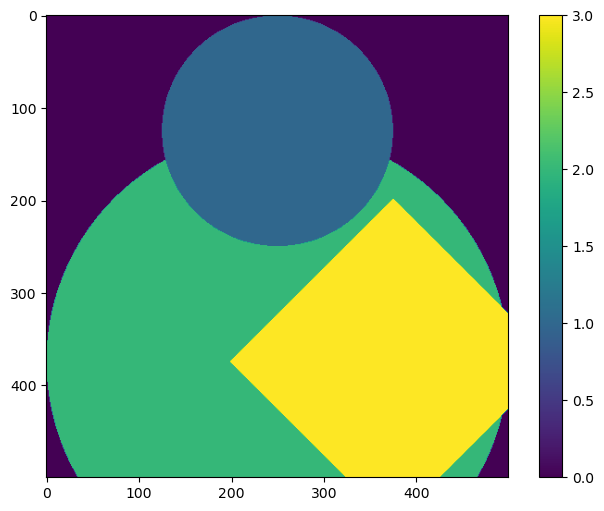

In [29]:
import numpy as np
import matplotlib.pyplot as plt

sphere1 = Sphere(material=1, center=(0, -0.5, 0), radius=0.5)
sphere2 = Sphere(material=2, center=(0, 0.5, 0), radius=1)
block = Block(material=3, center=(0.5, 0.5, 0), e1=(1, 1, 0), e2=(1, -1, 0), e3=(0, 0, 1), size=(1, 1, 1))
group = GroupObject([sphere2, sphere1, block])

# Create a grid of points
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xx, yy = np.meshgrid(x, y)

# Create a vectorized version of point_in_objectp
def get_epsilon(x, y):
    mat = group.query_material_at_point((x, y, 0))
    return 0 if mat is None else mat
point_in_object_vec = np.vectorize(get_epsilon)

material_map = point_in_object_vec(xx, yy)

# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(material_map, cmap='viridis')
plt.colorbar()
plt.show()